<a href="https://colab.research.google.com/github/Ahmedsuraihi/YOLOv8/blob/main/YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Fetch the official Pothole.Dataset.IVCNZ.zip from the GitHub release
!wget -qO Pothole.Dataset.IVCNZ.zip \
    https://github.com/jaygala24/pothole-detection/releases/download/v1.0.0/Pothole.Dataset.IVCNZ.zip


In [4]:
# Unzip into pothole-detection/ so that img-*.jpg and img-*.txt land there
!unzip -q Pothole.Dataset.IVCNZ.zip -d pothole-detection/


In [12]:
# 1) Remove the bad structure
!rm -rf dataset

# 2) Recreate the correct tree
!mkdir -p dataset/images/train dataset/images/val \
         dataset/labels/train dataset/labels/val

# 3) Copy all pothole files from the repo into train
!cp pothole-detection/Pothole_Dataset/img-*.jpg   dataset/images/train/
!cp pothole-detection/Pothole_Dataset/img-*.txt   dataset/labels/train/

# 4) (Optional) Move ~10% into val for validation (124 of ~1243)
!ls dataset/images/train | head -n 124 | xargs -I{} mv dataset/images/train/{} dataset/images/val/
!ls dataset/labels/train | head -n 124 | xargs -I{} mv dataset/labels/train/{} dataset/labels/val/

# 5) Verify counts
!echo "Train images:" $(ls dataset/images/train | wc -l)
!echo "Val   images:" $(ls dataset/images/val   | wc -l)
!echo "Train labels:" $(ls dataset/labels/train | wc -l)
!echo "Val   labels:" $(ls dataset/labels/val   | wc -l)


Train images: 1119
Val   images: 124
Train labels: 1119
Val   labels: 124


In [13]:
%%bash
cat > dataset.yaml <<EOF
train: dataset/images/train
val:   dataset/images/val
nc:    1
names: ['pothole']
EOF

# Preview
cat dataset.yaml


train: dataset/images/train
val:   dataset/images/val
nc:    1
names: ['pothole']


In [7]:
!pip install --upgrade pip
!pip install ultralytics onnx onnxruntime tensorflow



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 133.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 163.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 148.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 154.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45

In [9]:
!cat dataset.yaml

train: dataset/images/train
val:   dataset/images/val
nc:    1
names: ['pothole']


In [10]:
%%bash
cat > dataset.yaml <<EOF
train: dataset/images/train
val:   dataset/images/val

nc:    1
names: ['pothole']
EOF


In [14]:
!yolo detect train \
    model=yolov8n.pt \
    data=dataset.yaml \
    imgsz=256 \
    epochs=50 \
    batch=16 \
    name=pothole_yolov8n_256


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pothole_yolov8n_2563, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=

In [ ]:
# List the contents of your run folders
!ls runs/detect/pothole_yolov8n_256
!ls runs/detect/pothole_yolov8n_2562


args.yaml  weights
args.yaml			 R_curve.png	      train_batch2.jpg
confusion_matrix_normalized.png  results.csv	      val_batch0_labels.jpg
confusion_matrix.png		 results.png	      val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch1.jpg     val_batch1_pred.jpg
labels.jpg			 train_batch2800.jpg  val_batch2_labels.jpg
P_curve.png			 train_batch2801.jpg  val_batch2_pred.jpg
PR_curve.png			 train_batch2802.jpg  weights


Columns: ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']
Train loss cols: ['train/box_loss', 'train/cls_loss', 'train/dfl_loss']
Val   loss cols: ['val/box_loss', 'val/cls_loss', 'val/dfl_loss']
Metric cols:    ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']


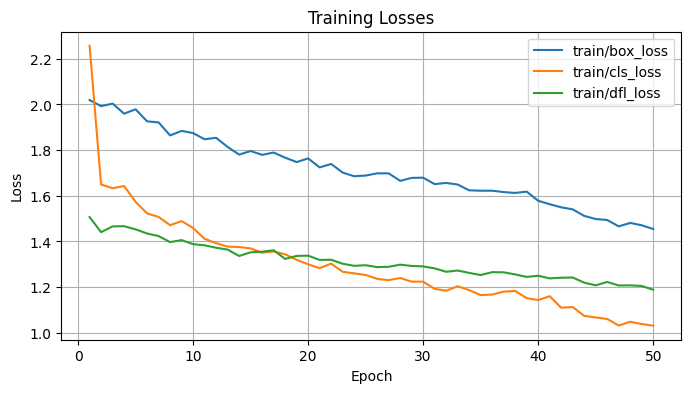

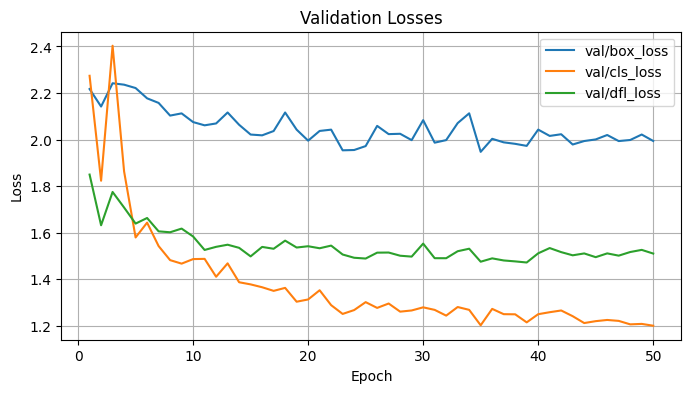

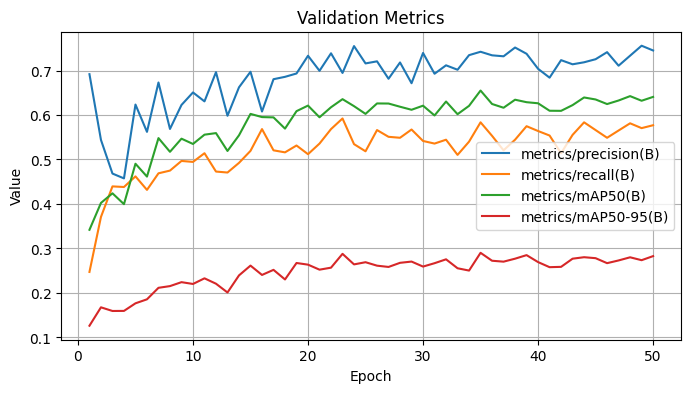

Final metrics:
 metrics/precision(B): 0.745
 metrics/recall(B): 0.577
 metrics/mAP50(B): 0.641
 metrics/mAP50-95(B): 0.283


In [18]:
# 1) Install any missing libs (you likely already have these)
!pip install --upgrade pip
!pip install pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# 1) Point this at whatever your find printed:
results_path = 'runs/detect/pothole_yolov8n_2563/results.csv'
df = pd.read_csv(results_path)

# 2) Inspect columns so you know what’s available:
print("Columns:", df.columns.tolist())

# 3) Epoch axis:
epochs = df['epoch']

# 4) Auto-group the columns:
train_loss_cols = [c for c in df.columns if c.startswith('train/')]
val_loss_cols   = [c for c in df.columns if c.startswith('val/')]
metric_cols     = [c for c in df.columns
                   if c.startswith('metrics/') and not c.startswith('metrics/val')]

print("Train loss cols:", train_loss_cols)
print("Val   loss cols:", val_loss_cols)
print("Metric cols:   ", metric_cols)

# 5) Plot training losses
plt.figure(figsize=(8,4))
for c in train_loss_cols:
    plt.plot(epochs, df[c], label=c)
plt.title('Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 6) Plot validation losses
plt.figure(figsize=(8,4))
for c in val_loss_cols:
    plt.plot(epochs, df[c], label=c)
plt.title('Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 7) Plot precision / recall / mAP curves
plt.figure(figsize=(8,4))
for c in metric_cols:
    plt.plot(epochs, df[c], label=c)
plt.title('Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# 8) Print final numbers
final = df.iloc[-1]
print("Final metrics:")
for c in metric_cols:
    print(f" {c}: {final[c]:.3f}")


In [ ]:
# replace with your actual image URL
!wget -qO test.jpg "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTMIU9R-QYNULNobr0mP2BLBPwAJpRSxrxYkw&s"
img_path="test.jpg"


In [19]:
!git clone https://github.com/Ahmedsuraihi/YOLOv8.git
%cd YOLOv8


Cloning into 'YOLOv8'...
/content/YOLOv8


In [23]:
!git config --global user.name "Ahmedsuraihi"
!git config --global user.email "eng.ahmedshaya@gmail.com"
!git branch --unset-upstream
!git add .
!git commit -m "Add Colab pipeline files"
!git push origin main


fatal: Branch 'main' has no upstream information
On branch main
nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address
